In [1]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

/home/emmanuel/miniconda3/envs/toughenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/emmanuel/miniconda3/envs/toughenv/lib/python3.7/site-packages/tslearn/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [132]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
import pandas as pd
plt.rcParams['figure.figsize']=(12,10)

In [8]:
seed=0
np.random.seed(seed)
X_train,y_train,X_test,y_test=CachedDatasets().load_dataset('Trace')
X_train=X_train[y_train<4] # Keep first 3 classes

In [9]:
np.random.shuffle(X_train)

In [10]:
# Keep only 50 time series
X_train=TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train=TimeSeriesResampler(sz=40).fit_transform(X_train)
sz=X_train.shape[1]

Euclidean k-means


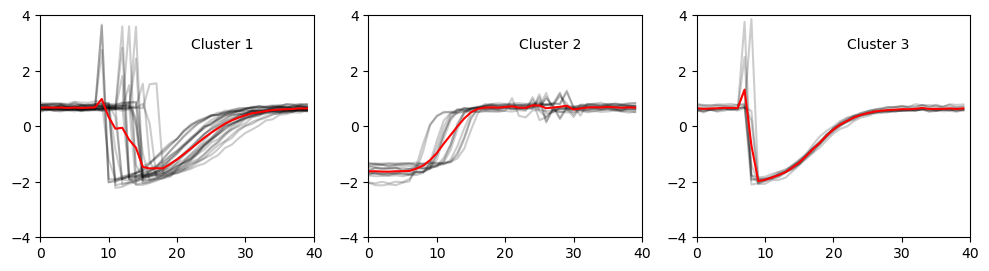

In [11]:
# Euclidean k-means
print('Euclidean k-means')
km=TimeSeriesKMeans(n_clusters=3,random_state=seed)
y_pred=km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred==yi]:
        plt.plot(xx,'k-',alpha=.2)
    plt.plot(km.cluster_centers_[yi],'r-')
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),transform=plt.gca().transAxes)

In [12]:
dba_km=TimeSeriesKMeans(n_clusters=3,n_init=2,metric='dtw',max_iter_barycenter=10,random_state=seed)

In [13]:
y_pred=dba_km.fit_predict(X_train)

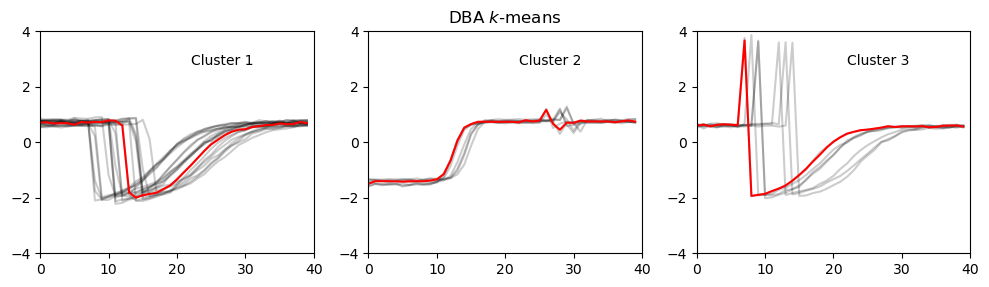

In [15]:
for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

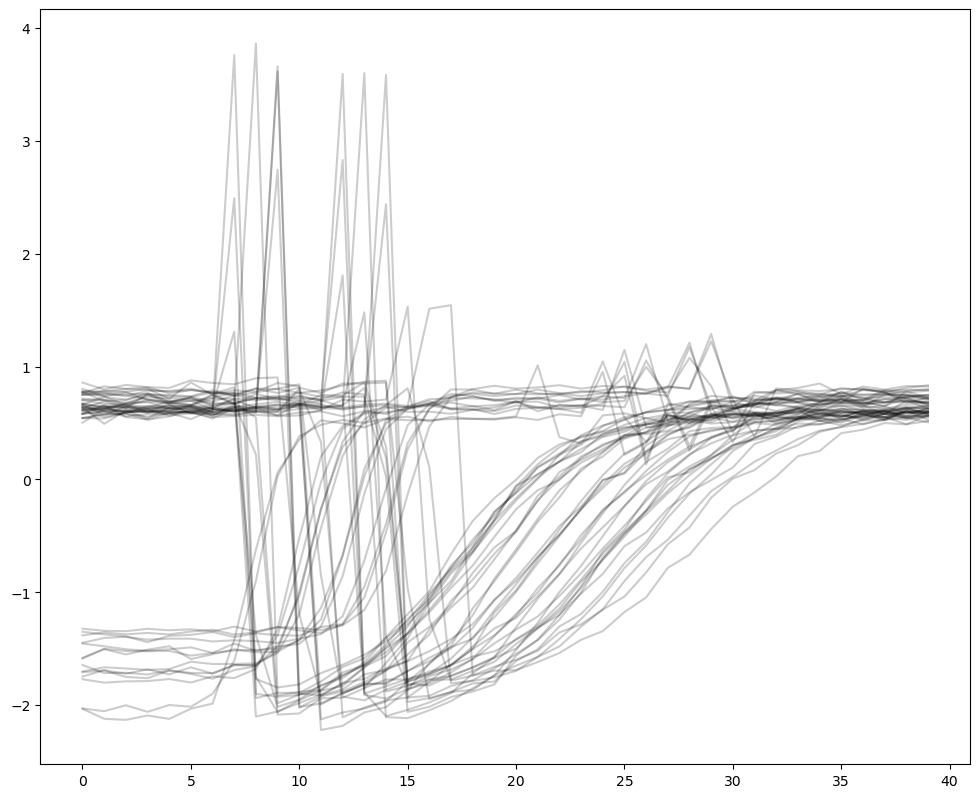

In [16]:
for xx in X_train:
    plt.plot(xx,'k-',alpha=.2)

In [17]:
af_df=pd.read_csv('../af_orig_country_year.csv')
af_df=af_df.rename(columns={'Unnamed: 0':'country.value','Unnamed: 1':'date'})
af_expr_piv=af_df.pivot(index='country.value',columns='date',values='af_ex_pr')

In [18]:
af_expr_piv=af_expr_piv.dropna()

In [149]:
Xs=TimeSeriesScalerMeanVariance().fit_transform(af_expr_piv.dropna())

In [101]:
af_expr_piv.T.plot(style='-',color='k',alpha=.2,legend=False)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [163]:
dba_km=TimeSeriesKMeans(n_clusters=3,n_init=2,metric=
                        'dtw',max_iter_barycenter=10)
y_pred=dba_km.fit_predict(Xs)

In [138]:
y_pred

array([ 6,  9, 14,  6, 13, 12, 11,  0, 18,  7,  4, 14,  8, 18,  1, 11,  8,
        5, 15, 10, 13, 16, 17, 11,  5,  4, 14, 15,  3,  5,  0,  4,  3, 15,
        0,  6,  2,  1,  1, 10,  3, 11,  7, 10, 17, 11,  7,  4,  5, 16, 10,
        3,  9, 15,  8,  1, 12,  3, 17,  6, 12,  8,  5,  7,  2,  2, 19,  6,
        6,  1, 15,  5,  9,  9])

['Albania' 'Austria' 'Bolivia (Plurinational State of)'
 'China, Taiwan Province of' 'Cyprus'
 "Democratic People's Republic of Korea" 'Ecuador' 'Finland' 'France'
 'Hungary' 'Israel' 'Malawi' 'Mexico' 'Morocco' 'Myanmar' 'Paraguay'
 'Singapore' 'Suriname' 'Switzerland' 'Syrian Arab Republic'
 'United Kingdom' 'United Republic of Tanzania' 'United States of America'
 'Unspecified Area' 'Uruguay']
['Argentina' 'Brazil' 'Canada' 'China, Hong Kong SAR' 'China, mainland'
 'Colombia' 'Egypt' 'Guatemala' 'Madagascar' 'Malaysia' 'Nicaragua'
 'Norway' 'Panama' 'Peru' 'Republic of Korea' 'Saudi Arabia'
 'South Africa' 'Sri Lanka' 'Sweden' 'Thailand' 'United Arab Emirates'
 'Viet Nam' 'Zambia' 'Zimbabwe']
['Australia' 'Bulgaria' 'Chile' 'Denmark' 'El Salvador' 'Greece' 'Guyana'
 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'Ireland' 'Italy'
 'Japan' 'Kenya' 'Lebanon' 'Netherlands' 'New Zealand' 'Nigeria'
 'Pakistan' 'Philippines' 'Poland' 'Portugal' 'Romania' 'Spain' 'Turkey']


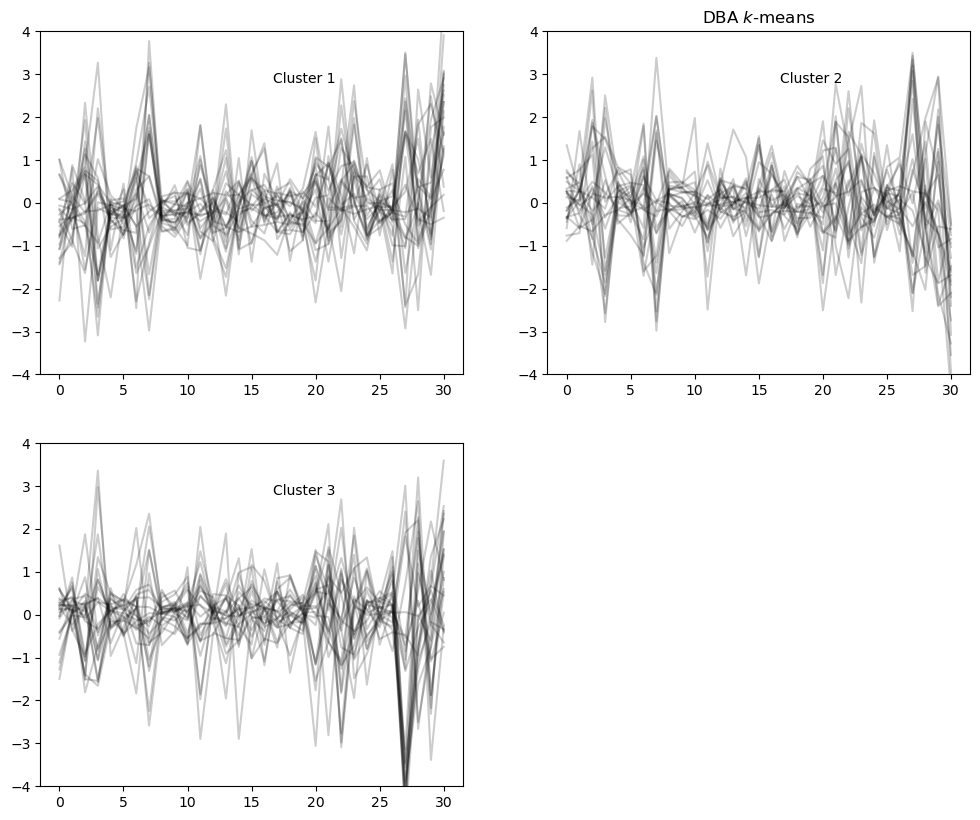

In [165]:

for yi in range(3):
    plt.subplot(2,2, 1+yi)
    print(af_expr_piv[y_pred==yi].index.values)
    for xx in Xs[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")


In [144]:
n=74
clusters=30
Xs=TimeSeriesScalerMeanVariance().fit_transform(af_expr_piv.iloc[:n,:].dropna())
dba_km=TimeSeriesKMeans(n_clusters=clusters,n_init=2,metric='dtw',max_iter_barycenter=10)
y_pred=dba_km.fit_predict(Xs)

['China, Taiwan Province of' 'India' 'Japan' 'Paraguay']
['Norway' 'Zambia' 'Zimbabwe']
['Sri Lanka']
['Finland']
["Democratic People's Republic of Korea" 'Mexico' 'Morocco' 'Singapore']
['Bulgaria' 'Denmark' 'Guyana' 'Pakistan']
['Colombia' 'Republic of Korea']
['Egypt' 'Hungary' 'Israel' 'Uruguay']
['Chile' 'Cyprus']
['Kenya' 'New Zealand' 'Turkey']
['Malaysia' 'United Arab Emirates']
['United Republic of Tanzania' 'United States of America']
['Argentina' 'Brazil' 'Canada' 'Guatemala' 'Madagascar']
['Australia' 'El Salvador' 'Indonesia' 'Lebanon']
['Philippines']
['China, Hong Kong SAR' 'Iran (Islamic Republic of)' 'Nicaragua'
 'Thailand']
['Bolivia (Plurinational State of)' 'France' 'Myanmar']
['Greece']
['Ireland' 'Netherlands' 'Nigeria' 'Poland']
['Syrian Arab Republic' 'Unspecified Area']
['Portugal']
['China, mainland' 'South Africa' 'Sweden']
['Malawi' 'Spain']
['Ecuador' 'Saudi Arabia' 'Switzerland']
['Viet Nam']
['Romania']
['Albania' 'Austria' 'Suriname']
['United Kingdom']


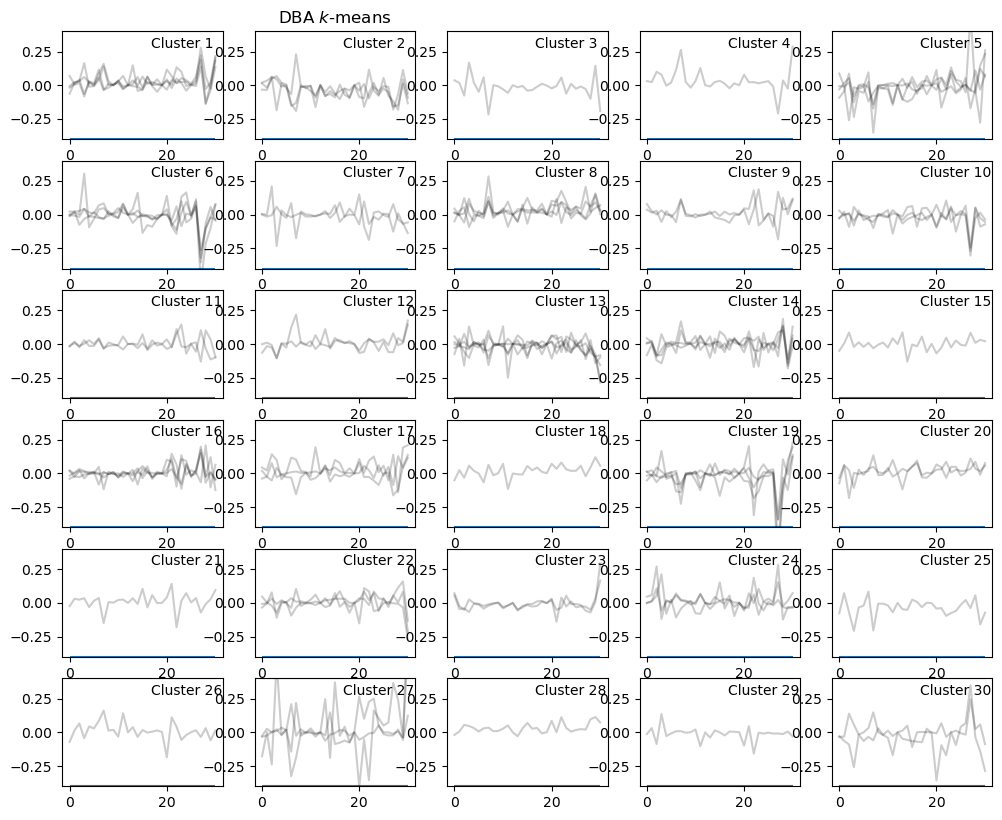

In [146]:
for yi in range(clusters):
    plt.subplot(6,5, 1+yi)
    print((af_expr_piv.iloc[:n,:])[y_pred==yi].index.values)
    for xx in af_expr_piv.iloc[:n,:][y_pred == yi].values:
        plt.plot(xx, "k-", alpha=.2)
#     plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.hlines(y=.4,xmin=0,xmax=30)
    plt.hlines(y=-.4,xmin=0,xmax=30)
    plt.ylim(-.4, .4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")
